# QC Guide for Hemisphere Light Bulbs (Camera + Optional Ultrasonic)

## Purpose
This short guide teaches a practical, repeatable checklist for quality control (QC) of **hemisphere light bulbs** from a **top-view camera image**, with an optional **ultrasonic** add-on for extra certainty.

## Assumptions
- The product is a hemisphere with nominal radius $R$.
- Camera is mounted above the apex; top view is (approximately) orthographic after lens/perspective correction.
- Intensity model (ideal top view):  
* $I(r)\propto \sqrt{1-(r/R)^2}$ for $0\le r\le R$ (brightest at center, decays smoothly to the rim).



## 1) Before You Start (Setup & Hygiene)
- **Geometry:** Calibrate lens distortion; correct perspective (camera normal to the surface).  
- **Exposure:** Fix ISO / shutter / aperture; avoid saturation at the center.  
- **Lighting:** Minimize reflections; use diffusers/polarizers if needed.  
- **Linearity (optional but better):** If your image is in sRGB/JPEG, linearize (approx. inverse gamma).  
- **Unit conversion:** If you need millimeters, set a scale (e.g., a ruler in the scene).



## 2) Shape QC (from the Camera Image)
**Goal:** Verify the top boundary is a **circle** of radius $R$ and the pattern is **radially symmetric**.

- **Boundary circle fit:** Detect the outer edge; fit a circle (Hough or robust least squares).  
  Report:
  - Radius error: * $|R_{\text{img}}-R|$  
  - Roundness error: RMS distance of boundary points to the fitted circle.
- **Radial symmetry:** Around the fitted center $(x_c,y_c)$, examine intensity along rings:
  - Angular variance per ring should be small (same brightness all around at fixed radius).  
  - Center→rim profiles (horizontal/vertical) should **decrease smoothly** (no steps/waves).

**Pass if:** radius error and roundness are within tolerance, and ring-wise variance is low.



## 3) Brightness Pattern QC (from the Camera Image)
**Goal:** Confirm the **shape of the brightness decay** matches the hemisphere model.

- **Radial profile fit:** Average intensity over angles to get $\bar I(r)$ and fit  
* $\bar I(r)\approx a\,\sqrt{1-(r/R)^2}+b$ (with known $R$).  
  Use $R^2$ (coefficient of determination) as goodness-of-fit.
- **Sanity ratios (model-based, for linear images):**  
* $\dfrac{\overline I_{\text{disk}}}{I_{\text{center}}}\approx \dfrac{2}{3}$  
* $\dfrac{\overline I_{\text{square}}}{I_{\text{center}}}\approx \dfrac{\pi}{6}$  (disk inside a tight square, background $0$)

**Pass if:** fit $R^2$ is high and the two ratios are close to the targets (within tolerance).



## 4) Brightness **Scale** QC (camera-only path)
**Goal:** Check the **amount** of brightness, not just its shape.

- **Simple calibration:** Capture a gray/white reference under the **same** exposure; define its linear value as $C$ (e.g., $C=255$ in 8-bit).  
  Then expect (ideal top view):
  - Center brightness $\approx C$ (no saturation).  
  - Disk mean $\approx \dfrac{2}{3}C$.  
  - Tight-square mean $\approx \dfrac{\pi}{6}C$.

**Pass if:** the three levels are met within tolerance (and no clipping at center).



## 5) Ultrasonic Add-On (stronger QC, optional)
**Why:** Ultrasound gives **height** $z(x,y)$, independent of light. The model says * $I\propto z$.

- **Linear relation test:** Regress * $I(x,y)\approx k\,z(x,y)+b$ over the disk with **$b\approx0$** and **high $R^2$**.  
  The slope $k$ is your effective $I_{\max}$; predict **center** intensity by * $kR$ and compare to the measured center.
- **Sphere consistency (geometry cross-check):** Verify * $r^2+z^2\approx R^2$ inside the disk (low mean squared residual).

**Pass if:** $I$–$z$ regression has high $R^2$, small intercept, and $kR$ matches the measured center.



## 6) Noise Control & Objective Filtering (optional but recommended)
**Purpose:** Reduce noise without biasing QC.

- Try **Gaussian** smoothing over $(k,\sigma)$ grid and pick the best by **MSE to a physics-based ideal** (if you generated one).  
- Visualize a **2D MSE heatmap** (x:$k$, y:$\sigma$) and select the minimum; use that filtered image for the checks above.



## 7) Suggested Pass/Fail Thresholds (example starting points)
- **Boundary radius error:** * $|R_{\text{img}}-R| \le \epsilon_R$ (e.g., $1\%$ of $R$).  
- **Roundness (RMS to circle):** $\le \epsilon_{\text{round}}$ (e.g., a few pixels or mm).  
- **Ring symmetry (angular variance):** below a small threshold at most radii.  
- **Radial fit ($R^2$):** $\ge 0.98$ for * $a\sqrt{1-(r/R)^2}+b$.  
- **Sanity ratios:** within $\pm 5\%$–$10\%$ of * $\dfrac{2}{3}$ and * $\dfrac{\pi}{6}$.  
- **$I$–$z$ regression (if ultrasonic):** $R^2\ge 0.98$, $|b|$ negligible; * $kR$ close to measured center.

Tune thresholds to your optics, sensor bit-depth, and production tolerances.



## 8) Common Pitfalls
- **Center saturation:** clips the peak, breaks the ratios and fits.  
- **Specular highlights/reflections:** create bright streaks → high ring variance.  
- **Vignetting:** darkens the rim more than the model → fails the radial fit.  
- **Uncorrected perspective/tilt:** boundary not circular → false shape fail.  
- **Nonlinear images (strong tone curves):** distort model ratios; linearize first.



## 9) Minimal QC Checklist (Do This Every Time)
- Boundary circle fit: radius error + roundness ✔️  
- Ring symmetry (low angular variance) ✔️  
- Smooth center→rim decay in cross-sections ✔️  
- Radial model fit * $\bar I(r)\approx a\sqrt{1-(r/R)^2}+b$ with high $R^2$ ✔️  
- Sanity ratios (* $\overline I_{\text{disk}}/I_{\text{center}}\approx 2/3$, * $\overline I_{\text{square}}/I_{\text{center}}\approx \pi/6$) ✔️  
- (If available) * $I$–$z$ regression with high $R^2$, small $b$, and * $kR$ matching center ✔️



## Appendix: Key Formulas (quick reference)
- Ideal top-view intensity (disk):  
* $I(r)=C\,\sqrt{1-(r/R)^2},\quad 0\le r\le R.$
- Mean intensities (linear image):  
* $\overline I_{\text{disk}}=\dfrac{2}{3}C$  
* $\overline I_{\text{square}}=\dfrac{\pi}{6}C$
- Surface mean (hemisphere, if needed):  
* $\langle I\rangle_{\text{surface}}=\dfrac{1}{2}I_{\max}R$; choosing * $I_{\max}=\dfrac{C}{R}$ makes it * $\dfrac{C}{2}.$
- Ultrasonic cross-modal check:  
* $I\approx k\,z+b\quad(\text{expect }b\approx0,\;R^2\text{ high}),\quad I_{\text{center}}\approx kR.$




___

# 7-b — Can we verify shape with an uncertain intensity? (Summary)

**Short answer:** **Partly.** You can validate **2D geometry** from the camera image, but you **cannot** reliably confirm the 3D hemispherical **curvature** without trustworthy intensity (or another modality).

## What you *can* check (intensity-independent)
- **Circular boundary & radius:** edge detection + circle fitting (radius error, roundness/RMS).
- **Radial symmetry:** uniform edge/gradient response along concentric rings.
- **Robustness across thresholds:** boundary remains stable under different (global/adaptive) thresholds.
- **Imaging geometry:** correct perspective/tilt so the boundary is circular (not elliptical).

## What you *cannot* rely on (needs correct intensity)
- Radial brightness model checks (e.g., center→rim decay).
- Model-based ratios (e.g., disk mean vs. center).
- Shape-from-shading or any test assuming a specific I–z relation.

## Comparison with 7-a
- **7-a (intensity trusted):** geometry **plus** strong brightness-pattern tests → higher confidence.
- **7-b (intensity uncertain):** geometry-only checks → acceptable for 2D shape, but **insufficient** to prove true hemispheric curvature.

## Recommendation
For final confirmation of hemispherical shape, add a depth/height modality (e.g., ultrasonic) or ensure photometric calibration so intensity becomes trustworthy.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
sensor_image = cv2.imread('/mnt/e/Term 4/HW/DIP-HW2/data/q7/sensor.png', cv2.IMREAD_GRAYSCALE)
if sensor_image is None:
    raise ValueError('Can`t load image')

print(f'Size of image: {sensor_image.shape}')

Size of image: (512, 512)


In [3]:
m, n = sensor_image.shape
intensities = sensor_image.astype(np.float32).ravel()

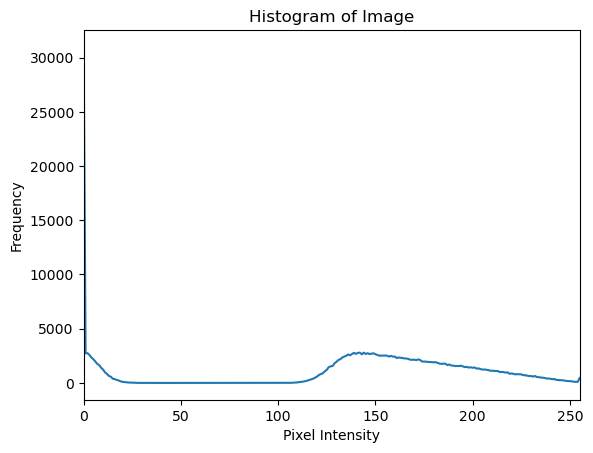

In [4]:
hist = cv2.calcHist([sensor_image], [0], None, [256], [0,256])

plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(hist)
plt.xlim([0, 255])
plt.show()

In [5]:
p20, p99 = np.percentile(intensities, [20, 99])

In [6]:
print(f'P20 is:{p20} and P99 is:{p99}') 

P20 is:11.0 and P99 is:243.0


In [7]:
np.mean(sensor_image[250:262, 250:262])

128.74305555555554

In [8]:
np.median(sensor_image[250:262, 250:262])

129.0

In [9]:
vmin, vmax = [128/256, 243/256]

In [10]:
R = 1
x = np.linspace(-R, R, m)
y = np.linspace(-R, R, n)
X, Y = np.meshgrid(x, y)

In [11]:
rho = np.sqrt(X**2 + Y**2)

In [12]:
z = np.zeros_like(X)

In [ ]:
z[rho<= R] = vmin + vmax * (1 - np.sqrt(R**2 - (rho[rho <= R])**2))

In [26]:
ideal_sensor_image = z

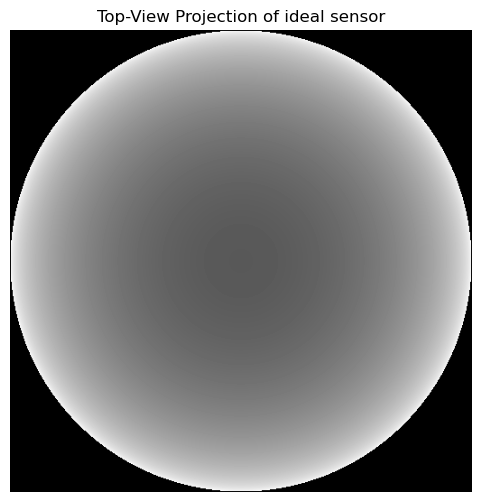

In [27]:
plt.figure(figsize=(6, 6))
plt.imshow(ideal_sensor_image, cmap='gray', extent=[-R, R, -R, R])
plt.axis('off')
plt.title('Top-View Projection of ideal sensor')
plt.show()

In [25]:
def compute_mse(image1, image2):
    return np.mean((image1.astype('float32') - image2.astype('float32')) ** 2)

In [23]:
kernel_sizes = list(range(3, 128, 2))
sigmas = np.linspace(3, 7, num=len(kernel_sizes), dtype=np.float32)

In [24]:
mse_map = np.zeros((len(sigmas), len(kernel_sizes)), dtype=np.float32)
best_guess = {'k': None, 'sigma': None, 'mse': np.inf, 'img': None}

In [28]:
for i, s in enumerate(sigmas):
    for j, k in enumerate(kernel_sizes):
        g = cv2.GaussianBlur(sensor_image, ksize=(k, k), sigmaX=float(s), sigmaY=float(s), borderType=cv2.BORDER_DEFAULT)
        mse_g = compute_mse(ideal_sensor_image, g)
        mse_map[i, j] = mse_g

        if mse_g < best_guess['mse']:
            best_guess['mse'] = mse_g
            best_guess['k'] = k
            best_guess['sigma'] = s
            best_guess['img'] = g


print(f"Best mse is for kernel size:{best_guess['k']} with sigma:{best_guess['sigma']} and mse={best_guess['mse']}")

Best mse is for kernel size:49 with sigma:7.0 and mse=22096.296875


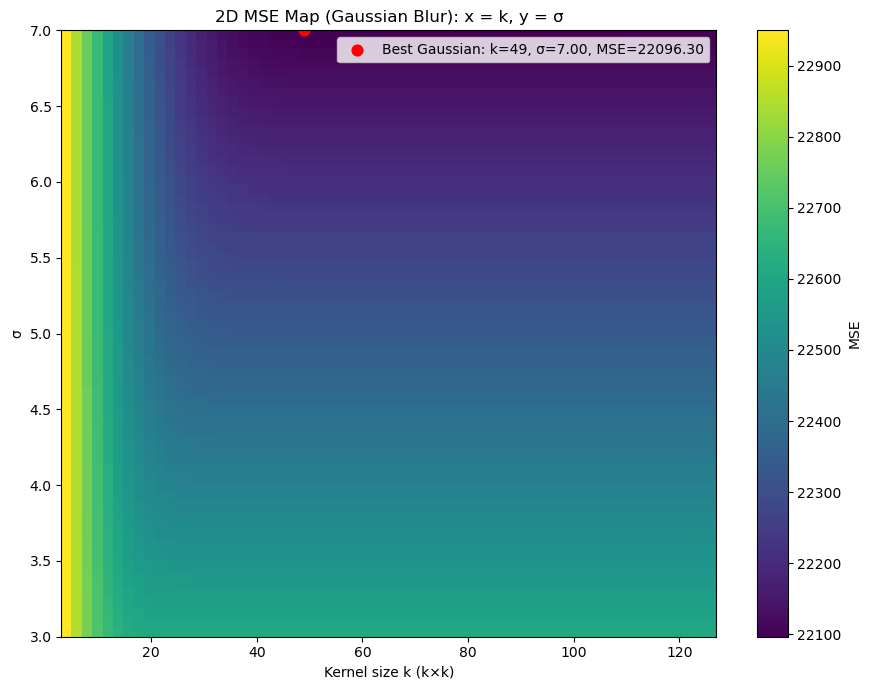

In [29]:
fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(
    mse_map,
    origin='lower',
    aspect='auto',
    extent=[kernel_sizes[0], kernel_sizes[-1], sigmas[0], sigmas[-1]]
)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('MSE')

ax.scatter([best_guess['k']], [best_guess['sigma']], s=60, marker='o',  color='red',
           label=f"Best Gaussian: k={best_guess['k']}, σ={best_guess['sigma']:.2f}, MSE={best_guess['mse']:.2f}")

ax.set_title('2D MSE Map (Gaussian Blur): x = k, y = σ')
ax.set_xlabel('Kernel size k (k×k)')
ax.set_ylabel('σ')
ax.legend()
plt.tight_layout()
plt.show()

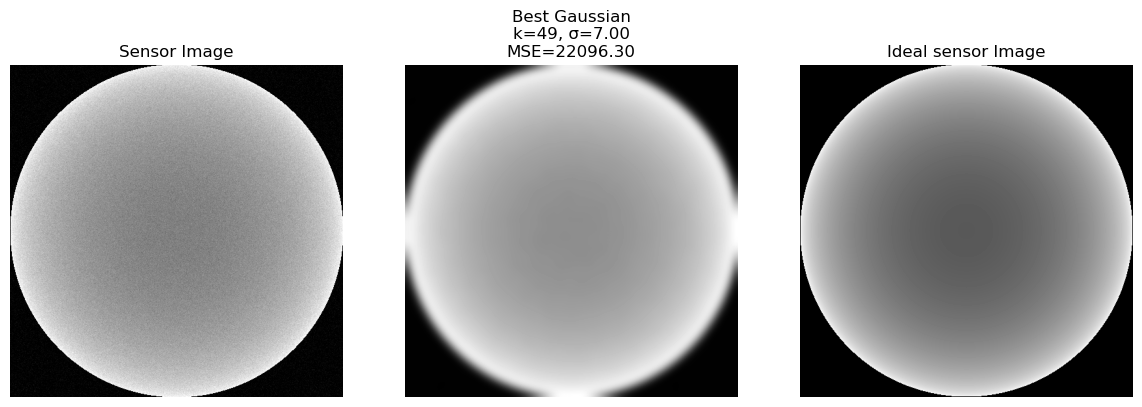

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(sensor_image, cmap='gray'); plt.title('Sensor Image'); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(best_guess['img'], cmap='gray')
plt.title(f'Best Gaussian\nk={best_guess["k"]}, σ={best_guess["sigma"]:.2f}\nMSE={best_guess["mse"]:.2f}')
plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(ideal_sensor_image, cmap='gray'); plt.title('Ideal sensor Image'); plt.axis('off')
plt.tight_layout()
plt.show()